## Velocity Dispersion Exercise

1. Consider a Gaussian-shaped emission line. If it's at wavelength 5000A and has sigma=10A (A is Angstroms), can you simulate and show the relevant chunk of the spectrum?
2. In astronomy we often use something called "full width at half maximum" (FWHM). It's exactly what it sounds like. So thinking about it, what is the FWHM for the line in part 1? What are the units of FWHM?

For the line in exercise 1, suppose that it's produced by gas moving with all kinds of turbulent velocities. Suppose that if the gas were not moving, the line would have been extremely narrow, determined only by quantum-mechanical effects. Given what we discussed, what is the turbulent velocity dispersion of the gas in exercise 1?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian(x, u, s):
    return np.exp(-np.power((x-u)/s, 2)/2)/(s*np.sqrt(2*np.pi)) # from normal distribution probability density function

def velocity(wl, wl0):
    c = 3*10**5 # km/s
    return c*(wl0/wl - 1)

### Analytic solution

Here, we consider a solution using the statistical properties of the Gaussian distribution.

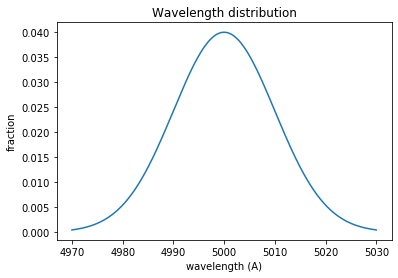

In [3]:
divs = 1000

wl0 = 5000
s = 10
wl = np.linspace(wl0 - 3*s, wl0 + 3*s, num=divs) # wavelength
frac = gaussian(wl, wl0, s) # fraction of stars with this wavelength

plt.title("Wavelength distribution")
plt.ylabel("fraction")
plt.xlabel("wavelength (A)")
plt.plot(wl, frac)
plt.show()

FWHM = 23.483483483483724


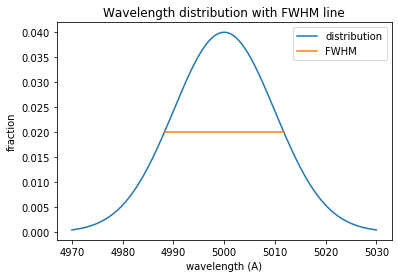

In [4]:
idx = np.searchsorted(frac[0:int(divs/2)], np.max(frac)/2)
fwhm = 2*(wl0-wl[idx])
print("FWHM =", fwhm)

wl_ = wl[idx:divs-idx]

plt.title("Wavelength distribution with FWHM line")
plt.ylabel("fraction")
plt.xlabel("wavelength (A)")
plt.plot(wl, frac, label='distribution')
plt.plot(wl_, np.full(wl_.shape, np.max(frac)/2), label='FWHM')
plt.legend()
plt.show()

From here, we see that the FWHM of the signal is $23.48 A$.

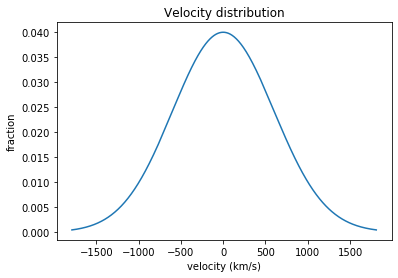

velocity dispersion = 1040.2977540471586


In [5]:
v = velocity(wl, wl0)

plt.title("Velocity distribution")
plt.ylabel("fraction")
plt.xlabel("velocity (km/s)")
plt.plot(v, frac)
plt.show()

print('velocity dispersion =', np.std(v))

So, the velocity dispersion of this system is $1040 km/s$.

### Simulation

Below, we consider a simulation of 10000 samples of gas randomly pulled from the normal distribution.

In [6]:
num = 10000

wl0 = 5000
s = 10

wl = np.random.normal(loc=wl0, scale=s, size=(num))
wl = np.sort(wl)

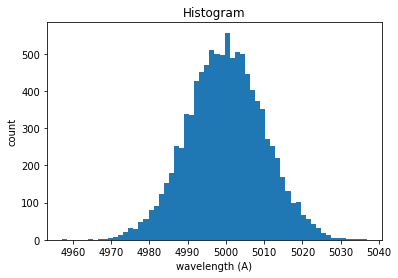

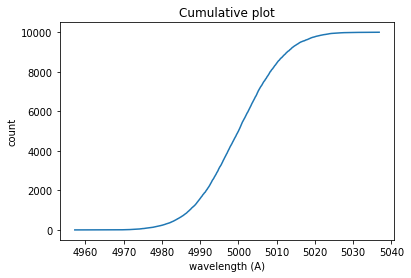

In [7]:
plt.title("Histogram")
plt.xlabel("wavelength (A)")
plt.ylabel("count")
bins = plt.hist(wl, bins=60)
plt.show()

cml = np.linspace(0, num, num=num)
plt.title("Cumulative plot")
plt.xlabel("wavelength (A)")
plt.ylabel("count")
plt.plot(wl, cml)
plt.show()

22.55069142163393


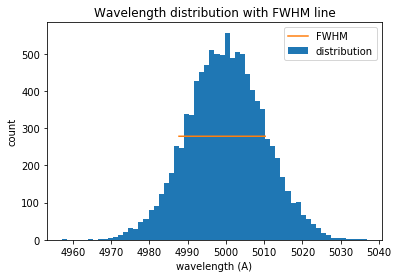

In [8]:
hm = np.max(bins[0])/2
pdx = np.argmax(bins[0])
for i in range(pdx-1, -1, -1):
    if bins[0][i] <= hm:
        lwl = bins[1][i]
        ldx = int(np.searchsorted(wl, lwl, 'left'))
        break
for i in range(pdx+1, num-1, 1):
    if bins[0][i] <= hm:
        rwl = bins[1][i]
        rdx = int(np.searchsorted(wl, rwl, 'right'))
        break

fwhm = rwl - lwl
print(fwhm)

wl_ = wl[ldx:rdx]

plt.title("Wavelength distribution with FWHM line")
plt.ylabel("count")
plt.xlabel("wavelength (A)")
plt.hist(wl, bins=60, label="distribution")
plt.plot(wl_, np.full(wl_.shape, hm), label="FWHM")
plt.legend()
plt.show()

Empirically, the FWHM of the signal is about $21 A$.

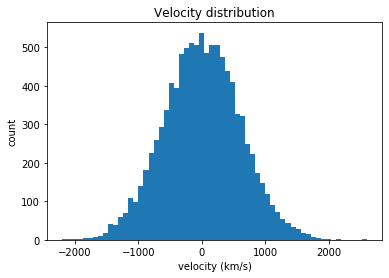

velocity dispersion = 598.4591598400284


In [9]:
v = velocity(wl, wl0)

plt.title("Velocity distribution")
plt.xlabel("velocity (km/s)")
plt.ylabel("count")
plt.hist(v, bins=60)
plt.show()

print('velocity dispersion =', np.std(v))

Empirically, the velocity dispersion is about $600 km/s$.